# MCU Model Performance Analysis

This notebook visualizes the performance of deployed LIF models on MCU, showing the relationship between maximum inference frequency and angular error.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = {
    'Model': [
        'baseline', 'no. recurrence', 'short', 'channels reduced', 'channels reduced', 'channels reduced', 'input reduced', 'input reduced', 'input reduced',
    ],
    'Specs': [
        '32ch., 256x256, 8l., rec.', '32ch., 256x256, 8l., no rec.', '32ch., 256x256, 6l., rec.', '16ch., 256x256, 8l., rec.', '8ch., 256x256, 8l., rec.', '4ch., 256x256, 8l., rec.', '32ch., 128x128, 8l., rec.', '32ch., 64x64, 8l., rec.', '32ch., 32x32, 8l., rec.',
    ],
    'N. Operations [M ops.]': [7380, ],
    'AAE [degrees]': [24, ],
    'Static Memory Allocation [MB]': [76, ]
}

df = pd.DataFrame(data)
print("Data loaded successfully:")
print(df)

Data loaded successfully:
      Model                      Specs  N. Operations [M ops.]  AAE [degrees]  \
0  baseline  32ch., 256x256, 8l., rec.                    7380             24   

   Static Memory Allocation [MB]  
0                             76  


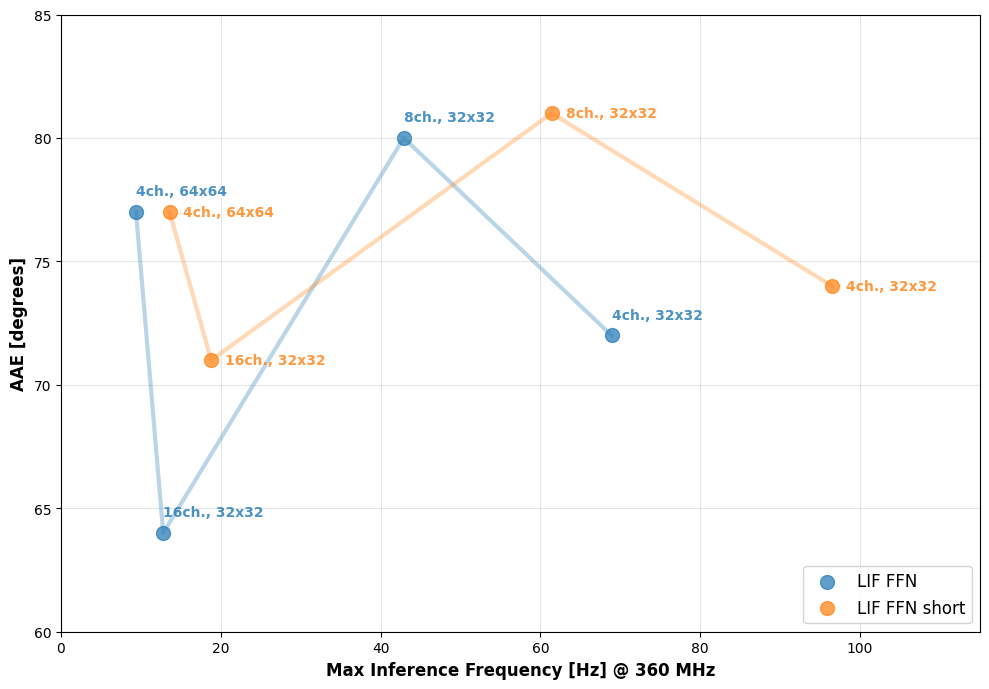


=== Summary Statistics ===

LIF FN:
  Frequency range: nan - nan Hz
  Angular Error range: nan - nan°
  Mean Angular Error: nan°

LIF FN short:
  Frequency range: nan - nan Hz
  Angular Error range: nan - nan°
  Mean Angular Error: nan°


In [24]:
# Create the scatter plot with separate series for each model
plt.figure(figsize=(10, 7))

# Set transparent background
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0.0)

# Plot LIF FFN models
lif_fn = df[df['Model'] == 'LIF FFN']
plt.scatter(lif_fn['Max Frequency [Hz]'], lif_fn['Angular Error [degrees]'],
            label='LIF FFN', s=100, alpha=0.7, marker='o', color='#1f77b4')
# Add line connecting LIF FFN points
lif_fn_sorted = lif_fn.sort_values('Max Frequency [Hz]')
plt.plot(lif_fn_sorted['Max Frequency [Hz]'], lif_fn_sorted['Angular Error [degrees]'],
         color='#1f77b4', alpha=0.3, linewidth=3)

# Annotate specs for LIF FN (right of dot, color of dot)
for i, row in lif_fn.iterrows():
    plt.annotate(row['Specs'], (row['Max Frequency [Hz]'], row['Angular Error [degrees]']),
                 textcoords="offset points", xytext=(0,15), ha='left', va='center', fontsize=10, alpha=0.8, color='#1f77b4', fontweight='bold')

# Plot LIF FFN short models
lif_ffn_short = df[df['Model'] == 'LIF FFN short']
plt.scatter(lif_ffn_short['Max Frequency [Hz]'], lif_ffn_short['Angular Error [degrees]'],
            label='LIF FFN short', s=100, alpha=0.7, marker='o', color='#ff7f0e')
# Add line connecting LIF FFN short points
lif_ffn_short_sorted = lif_ffn_short.sort_values('Max Frequency [Hz]')
plt.plot(lif_ffn_short_sorted['Max Frequency [Hz]'], lif_ffn_short_sorted['Angular Error [degrees]'],
         color='#ff7f0e', alpha=0.3, linewidth=3)

# Annotate specs for LIF FFN short (right of dot, color of dot)
for i, row in lif_ffn_short.iterrows():
    plt.annotate(row['Specs'], (row['Max Frequency [Hz]'], row['Angular Error [degrees]']),
                 textcoords="offset points", xytext=(10,0), ha='left', va='center', fontsize=10, alpha=0.8, color='#ff7f0e', fontweight='bold')

# Customize the plot
plt.xlabel('Max Inference Frequency [Hz] @ 360 MHz', fontsize=12, fontweight='bold')
plt.ylabel('AAE [degrees]', fontsize=12, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 115)
plt.ylim(60, 85)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
for model in ['LIF FN', 'LIF FN short']:
    model_data = df[df['Model'] == model]
    print(f"\n{model}:")
    print(f"  Frequency range: {model_data['Max Frequency [Hz]'].min():.1f} - {model_data['Max Frequency [Hz]'].max():.1f} Hz")
    print(f"  Angular Error range: {model_data['Angular Error [degrees]'].min():.0f} - {model_data['Angular Error [degrees]'].max():.0f}°")
    print(f"  Mean Angular Error: {model_data['Angular Error [degrees]'].mean():.1f}°")

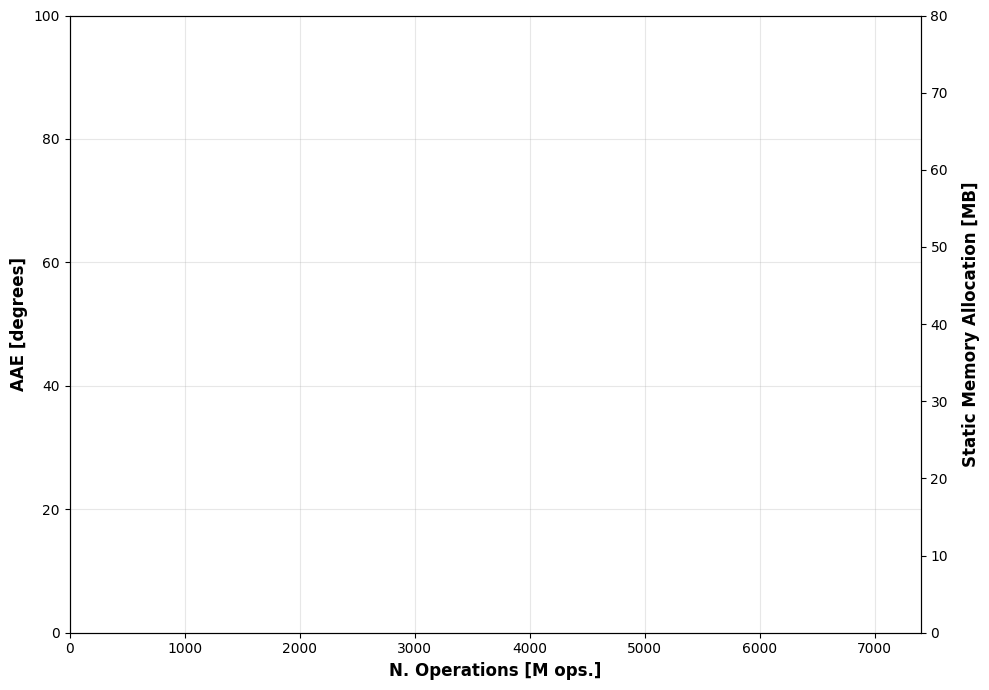

In [36]:
# Empty graph to show only axes, with a second y axis for Static Memory Allocation [MB]
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_facecolor('none')
fig.patch.set_alpha(0.0)
ax1.set_xlabel('N. Operations [M ops.]', fontsize=12, fontweight='bold')
ax1.set_ylabel('AAE [degrees]', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 7400)
ax1.set_ylim(0, 100)
ax1.grid(True, alpha=0.3)

# Create second y axis
ax2 = ax1.twinx()
ax2.set_ylabel('Static Memory Allocation [MB]', fontsize=12, fontweight='bold', labelpad=10)
ax2.set_ylim(0, 80)

fig.tight_layout()
plt.show()